In [11]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt

extracted_dir = '../food_delivery_dataset'
# files = os.listdir(extracted_dir)
# print("Extracted files:", files)

# Step 4: Use the correct file from the extracted list
csv_file_path = f"{extracted_dir}/train.csv"  # Replace with 'train.csv' since it's one of the files

# Step 5: Create a DataFrame from the extracted CSV file
df = pd.read_csv('../food_delivery_dataset/train.csv')

# Display the first few rows of the DataFrame
print(df.columns)

Index(['ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Order_Date', 'Time_Orderd',
       'Time_Order_picked', 'Weatherconditions', 'Road_traffic_density',
       'Vehicle_condition', 'Type_of_order', 'Type_of_vehicle',
       'multiple_deliveries', 'Festival', 'City', 'Time_taken(min)'],
      dtype='object')


In [145]:
time_taken = df['Time_taken(min)'].str.split(" ").str[1]

time_taken = pd.DataFrame(time_taken)

time_taken["Time_taken(min)"] = time_taken["Time_taken(min)"].astype(int)

In [146]:
print(time_taken.max())
print(time_taken.min())

Time_taken(min)    54
dtype: int64
Time_taken(min)    10
dtype: int64


In [147]:
bins = [10, 20, 30, 40, 50 , 60]

time_taken['interval'] = pd.cut(time_taken["Time_taken(min)"], bins)

time_taken

,Time_taken(min),interval
0,24,"(20, 30]"
1,33,"(30, 40]"
2,26,"(20, 30]"
3,21,"(20, 30]"
4,30,"(20, 30]"
...,...,...
45588,32,"(30, 40]"
45589,36,"(30, 40]"
45590,16,"(10, 20]"
45591,26,"(20, 30]"


In [148]:
bin_count = time_taken['interval'].value_counts().sort_index()

In [149]:
time_taken['rating'] = df['Delivery_person_Ratings'].astype(float)

average_rating_per_interval = time_taken.groupby('interval')['rating'].mean() - 4

average_rating_per_interval

/var/folders/2t/gftqwtk579jcc7_0379k_f900000gn/T/ipykernel_31004/21359329.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_rating_per_interval = time_taken.groupby('interval')['rating'].mean() - 4


interval
(10, 20]    0.741096
(20, 30]    0.716612
(30, 40]    0.383973
(40, 50]    0.478663
(50, 60]    0.496512
Name: rating, dtype: float64

<Axes: xlabel='interval'>

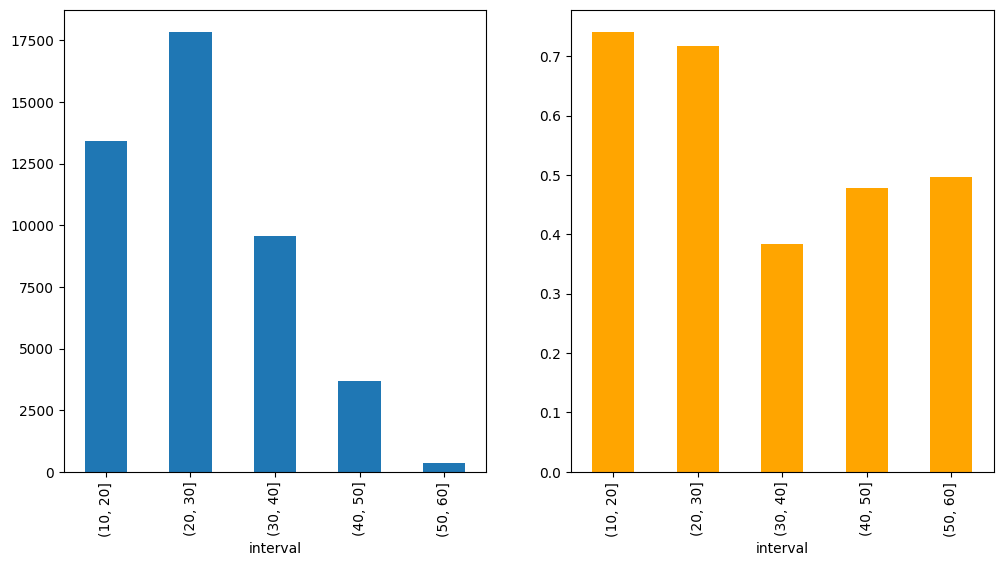

In [150]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
bin_count.plot(kind='bar')
plt.subplot(1, 2, 2)
average_rating_per_interval.plot(kind='bar', color='orange')

Hypothesis - When the time taken for a delivery increaese the average rating decreases.

In [151]:
def haversine(lat1, lon1, lat2, lon2):
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a)) 
    r = 6371
    return c * r

delivery_time_vs_distance = df[['Restaurant_latitude','Restaurant_longitude', 'Delivery_location_latitude','Delivery_location_longitude']]
delivery_time_vs_distance['Distance_km'] = delivery_time_vs_distance.apply(lambda row: haversine(
    row['Restaurant_latitude'], 
    row['Restaurant_longitude'], 
    row['Delivery_location_latitude'], 
    row['Delivery_location_longitude']
), axis=1)

delivery_time_vs_distance['time_taken'] = df['Time_taken(min)'].str.split(" ").str[1]

print(delivery_time_vs_distance)

       Restaurant_latitude  Restaurant_longitude  Delivery_location_latitude  \
0                22.745049             75.892471                   22.765049   
1                12.913041             77.683237                   13.043041   
2                12.914264             77.678400                   12.924264   
3                11.003669             76.976494                   11.053669   
4                12.972793             80.249982                   13.012793   
...                    ...                   ...                         ...   
45588            26.902328             75.794257                   26.912328   
45589             0.000000              0.000000                    0.070000   
45590            13.022394             80.242439                   13.052394   
45591            11.001753             76.986241                   11.041753   
45592            23.351058             85.325731                   23.431058   

       Delivery_location_longitude  Dis

/var/folders/2t/gftqwtk579jcc7_0379k_f900000gn/T/ipykernel_31004/3200280265.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_time_vs_distance['Distance_km'] = delivery_time_vs_distance.apply(lambda row: haversine(
/var/folders/2t/gftqwtk579jcc7_0379k_f900000gn/T/ipykernel_31004/3200280265.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_time_vs_distance['time_taken'] = df['Time_taken(min)'].str.split(" ").str[1]


In [152]:
df_replaced = df.replace('NaN', np.nan, regex=True)

df_dropped = df_replaced.dropna()

df_dropped.columns

df_dropped['Time_Order_picked'] = pd.to_datetime(df_dropped['Time_Order_picked'])
df_dropped['Time_Orderd'] = pd.to_datetime(df_dropped['Time_Orderd'])

# df_dropped
result = (df_dropped['Time_Order_picked'] - df_dropped['Time_Orderd']).dt.total_seconds() / 60



/var/folders/2t/gftqwtk579jcc7_0379k_f900000gn/T/ipykernel_31004/924855879.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_dropped['Time_Order_picked'] = pd.to_datetime(df_dropped['Time_Order_picked'])
/var/folders/2t/gftqwtk579jcc7_0379k_f900000gn/T/ipykernel_31004/924855879.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dropped['Time_Order_picked'] = pd.to_datetime(df_dropped['Time_Order_picked'])
/var/folders/2t/gftqwtk579jcc7_0379k_f900000gn/T/ipykernel_31004/924855879.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensu

In [153]:
delivery_time_vs_distance["time_taken"] = delivery_time_vs_distance["time_taken"].astype(float)

delivery_time_vs_distance["time_taken"] = delivery_time_vs_distance["time_taken"]

delivery_time_vs_distance['interval'] = pd.cut(delivery_time_vs_distance["time_taken"], bins)

delivery_time_vs_distance

/var/folders/2t/gftqwtk579jcc7_0379k_f900000gn/T/ipykernel_31004/2077771152.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_time_vs_distance["time_taken"] = delivery_time_vs_distance["time_taken"].astype(float)
/var/folders/2t/gftqwtk579jcc7_0379k_f900000gn/T/ipykernel_31004/2077771152.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_time_vs_distance["time_taken"] = delivery_time_vs_distance["time_taken"]
/var/folders/2t/gftqwtk579jcc7_0379k_f900000gn/T/ipykernel_31004/2077771152.py

,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Distance_km,time_taken,interval
0,22.745049,75.892471,22.765049,75.912471,3.025149,24.0,"(20, 30]"
1,12.913041,77.683237,13.043041,77.813237,20.183530,33.0,"(30, 40]"
2,12.914264,77.678400,12.924264,77.688400,1.552758,26.0,"(20, 30]"
3,11.003669,76.976494,11.053669,77.026494,7.790401,21.0,"(20, 30]"
4,12.972793,80.249982,13.012793,80.289982,6.210138,30.0,"(20, 30]"
...,...,...,...,...,...,...,...
45588,26.902328,75.794257,26.912328,75.804257,1.489846,32.0,"(30, 40]"
45589,0.000000,0.000000,0.070000,0.070000,11.007735,36.0,"(30, 40]"
45590,13.022394,80.242439,13.052394,80.272439,4.657195,16.0,"(10, 20]"
45591,11.001753,76.986241,11.041753,77.026241,6.232393,26.0,"(20, 30]"


/var/folders/2t/gftqwtk579jcc7_0379k_f900000gn/T/ipykernel_31004/4213815498.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_distance_per_interval = delivery_time_vs_distance.groupby('interval')['Distance_km'].mean()


<Axes: xlabel='interval'>

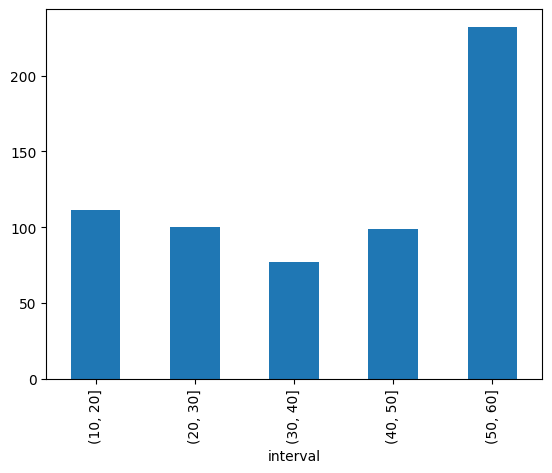

In [154]:
average_distance_per_interval = delivery_time_vs_distance.groupby('interval')['Distance_km'].mean()


average_distance_per_interval.plot(kind='bar')